In [63]:
#keeps the information about the experiment

import math

class data:
    
    const = 10000 #magnetic constant
    
    t = 0 #current time delay
    
    flux_real = 723 #trying to estimate it
    flux_min = 0 #left border
    flux_max = 1000 #right border
    flux_step = 0.01 
    
    present = [] #current probability field 
    initial = [] #initial probability field
    interval = [] #fluxes field
    
    repeat = 5 #amount of repeats for a constant time delay
    
    t_min = (math.pi / 2) / (const * (flux_max + flux_min) / 2)
    t_max = (math.pi / 2) / (const * (flux_max + flux_min) / 2) * 1024
    
    n = round((flux_max - flux_min) / flux_step) + 1 #amount of dots
    
    def __init__(self):
        data.t = data.t_min
        for i in range(data.n):
            data.present.append(1 / data.n) #uniform distribution
            data.initial.append(1 / data.n) #uniform distribution 
            data.interval.append(data.flux_min + i * data.flux_step) #fluxes field
            
    def __del__(self):
        print(' ')
                 
    def double_delay(self):
        data.t *= 2 
        
    #checks the amount of dots

    def test(self, err):
    
        if (6 * err / data.flux_step <= 10):
            return False
        else:
            return True    
        
    #expands the chosen interval and fills it    

    def expand(self, err):
    
        if test(data, err):
        
            width = round(err / data.flux_step) # 1/2 width of the chosen interval 
        
            for i in range(2 * width):
                
                data.interval.insert()

In [64]:
#returns the state 

import numpy as np

np.random.seed(47)

def randbin(data, f):
    phi = data.const * f * data.t
    p_0 = (np.sin(phi / 2)) ** 2
    return np.random.choice([0,1], size=(1,1), p=[p_0, 1-p_0]).reshape(1)[0]

#returns the probability of the given state depending on the given flux 

import numpy as np

def pstate(data, x, f):
    if x == 0:
        return (np.sin(data.const * f * data.t / 2)) ** 2
    else:
        return (np.cos(data.const * f * data.t / 2)) ** 2

In [65]:
#the bayes theorem

def bayes(data):
    
    serv = 0
    for i in range(data.repeat):
        serv += randbin(data, data.flux_real)
    h = round(serv / data.repeat)    
    
    normalization = 0

    for i in range(len(data.present)):
        data.present[i] = data.present[i] * pstate(data, h, data.flux_min + i * data.flux_step)
        normalization += data.present[i]
    
    for i in range(len(data.present)):
        data.present[i] /= normalization

In [66]:
#calculates the average 

def avg(array_x, array_y):
    
    avg = 0
    normalization = 0
    
    for i in range(len(array_x)):
        avg += array_x[i] * array_y[i]
        normalization += array_x[i]
        
    return avg / normalization #average array_x

In [67]:
#calculates the error

import numpy as np

def sigma(probs, fluxes):
    
    number = 1 / np.sqrt(2)
    
    pike_x = avg(probs, fluxes) 
    pike_y = 0
    
    for i in range(len(probs)):
        if probs[i] > pike_y:
            pike_y = probs[i]
    
    flux_step = fluxes[1] - fluxes[0]
    
    count = 0
    
    for i in range(len(probs)):
        if probs[i] > number * pike_y:
            count = count + 1
        
    return count * flux_step / 2

In [70]:
#graphics

import matplotlib.pyplot as plt
import numpy as np

def draw_distribution(data):
    
    plt.rcParams['figure.figsize'] = [10, 10]
    
    plt.plot(data.interval, data.present, 'o', color = 'b', label = 'current step')
    plt.plot(data.interval, data.initial, 'o', color = 'r', label = 'initial')
    
    plt.title('distribution', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    
    plt.show()

def draw_scale(dflux, dtime):
    
    heiz = np.array([])
    shot = np.array([])
    
    dflux = np.array(dflux)
    dtime = np.array(dtime)
    
    for i in range(len(dtime)):
        heiz = np.append(heiz, np.log2(1 / dtime[i]))
        shot = np.append(shot, np.log2(1 / np.sqrt(dtime[i])))     
    
    for i in range(len(dtime)):
        dflux[i] = np.log2(dflux[i])
        dtime[i] = np.log2(dtime[i])
    
    plt.rcParams['figure.figsize'] = [10,10]
    
    A3 = np.vstack([dtime, np.ones(len(dtime))]).T
    m3, c3 = np.linalg.lstsq(A3, dflux, rcond=None)[0]
    plt.plot(dtime, dflux, 'o', color = 'k', markersize = 5)
    plt.plot(dtime, m3*dtime + c3, 'c', label = 'experiment')
    
    A1 = np.vstack([dtime, np.ones(len(dtime))]).T
    m1, c1 = np.linalg.lstsq(A1, heiz, rcond=None)[0]
    #plt.plot(dtime, heiz, 'o', color = 'k', markersize = 5)
    plt.plot(dtime, m1*dtime + c3, 'g', label='heizenberg')
    
    A2 = np.vstack([dtime, np.ones(len(shot))]).T
    m2, c2 = np.linalg.lstsq(A2, shot, rcond=None)[0]
    #plt.plot(dtime, shot, 'o', color = 'k', markersize = 5)
    plt.plot(dtime, m2*dtime + c3, 'g', label = 'shot noise')
    
    plt.title('scaling', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    
    print('slope:', m3,'intercept:', c3)
    
    plt.show()

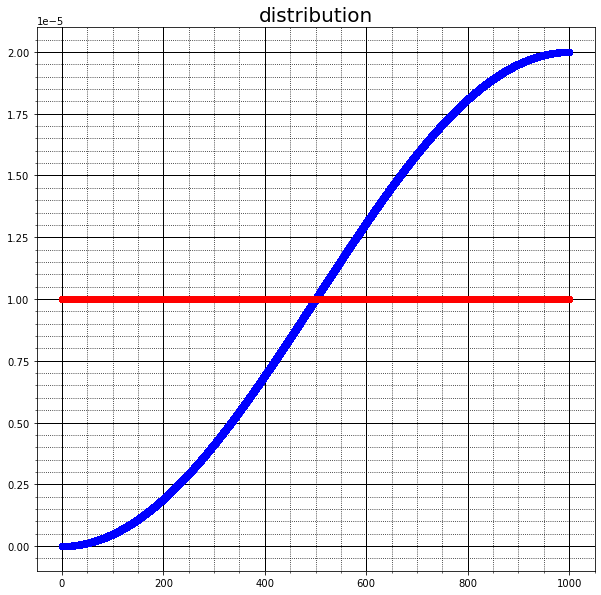

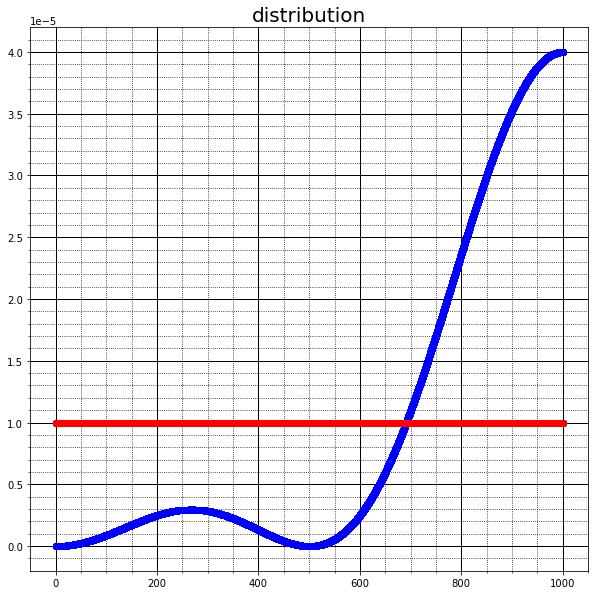

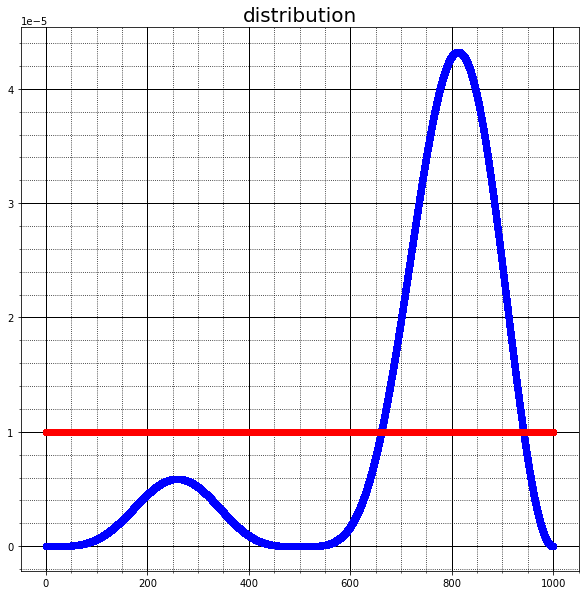

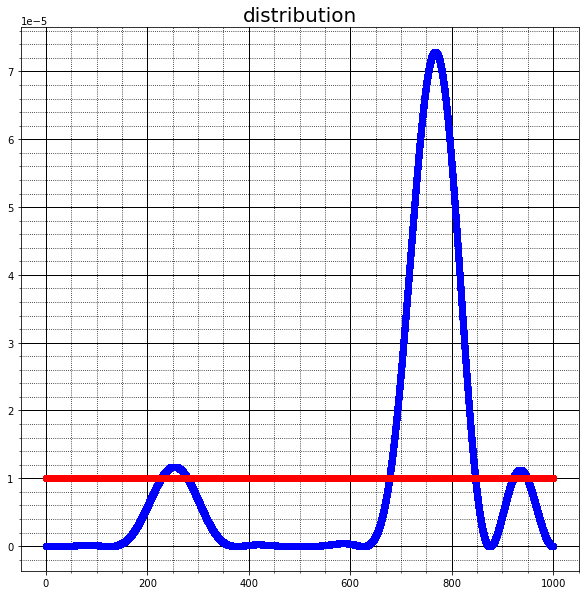

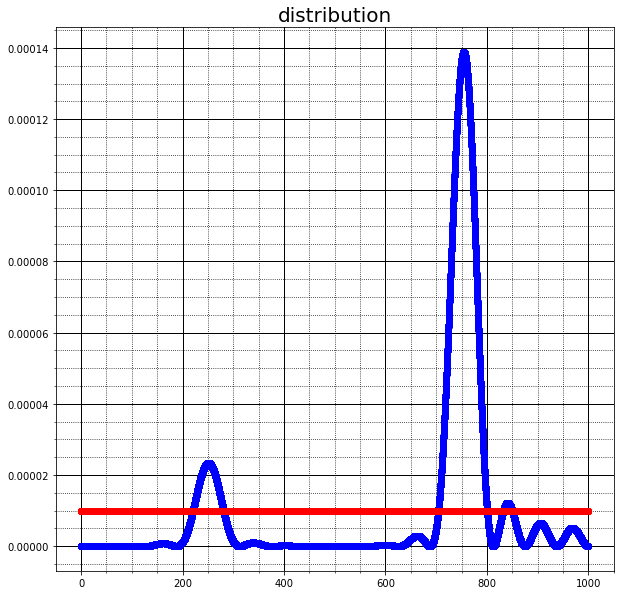

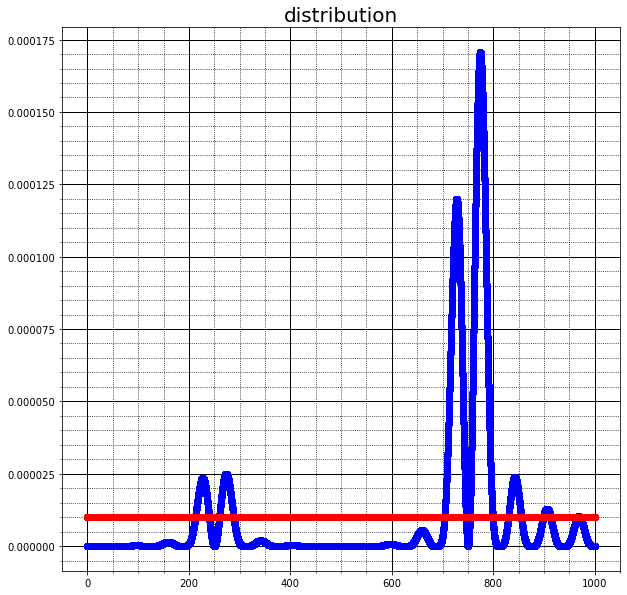

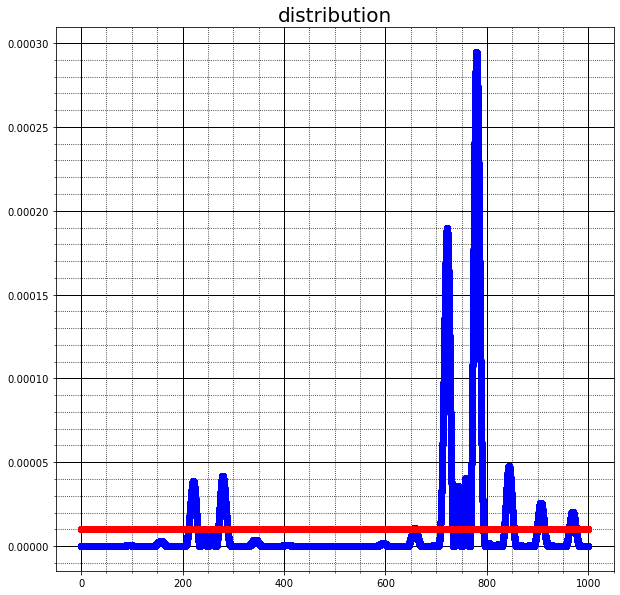

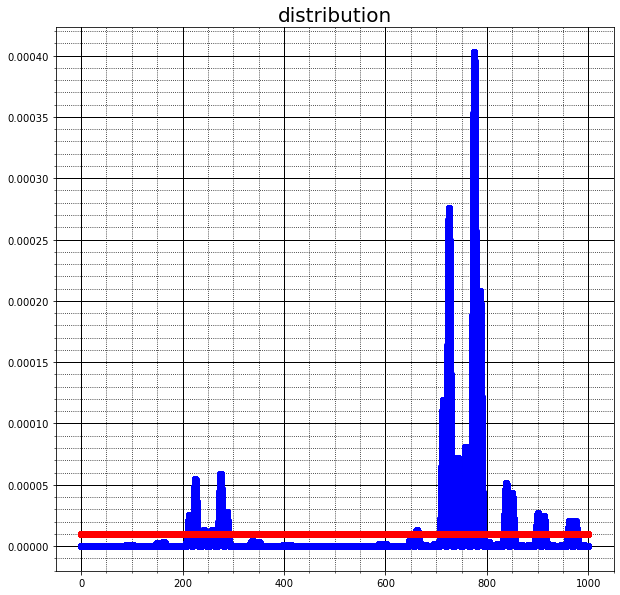

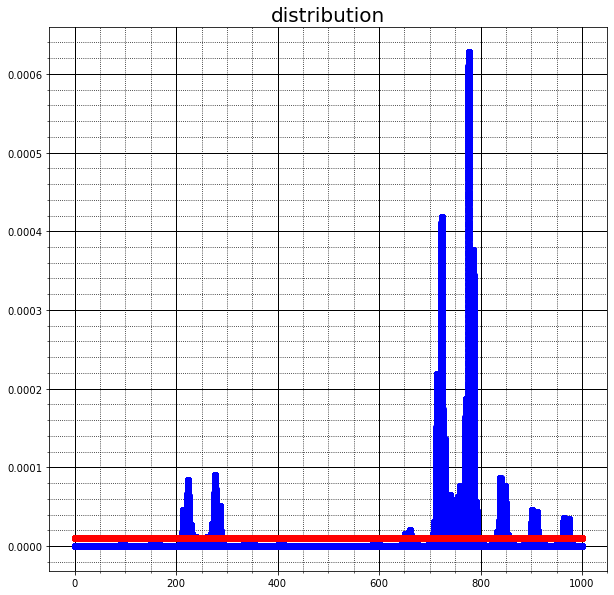

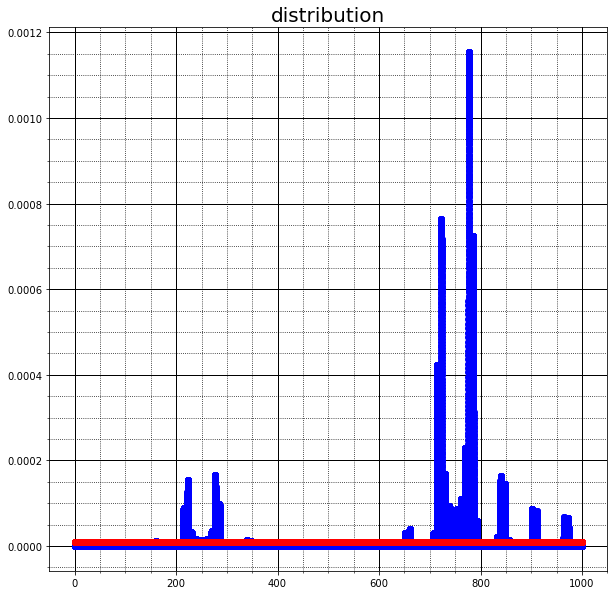

calculated flux is 704.6983897813897 +- 0.605 ( 0.08585233183059805 %)
and the real flux was 723 . mistake: 2.531343045450946 %
slope: -1.155380938795777 intercept: -12.152923661164506


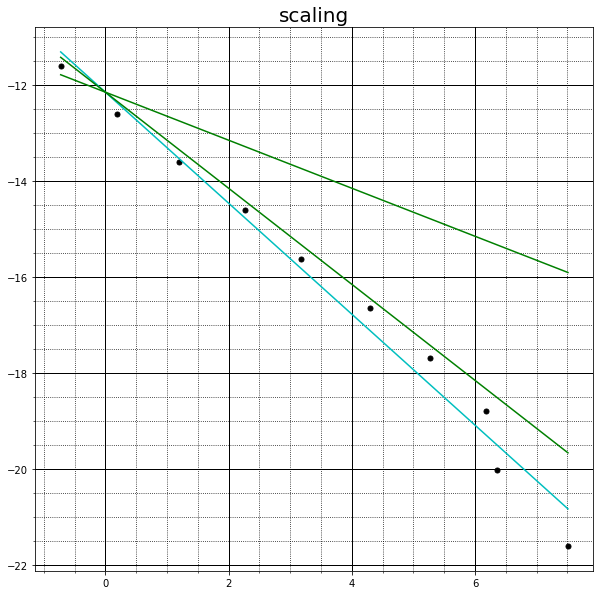

In [69]:
#main

import numpy as np

experiment = data()

delta_flux = []
delta_t = []

for i in range(int(np.log2(experiment.t_max/ experiment.t_min))):
    
    #draw_distribution(experiment)
    
    bayes(experiment) #one step of bayes theorem
    
    
    err = sigma(experiment.present, experiment.interval) #calculates and saves the error
        
    delta_flux.append(err) #saves the error
    
    if i == 0:
        delta_t.append(experiment.t)
    else:
        delta_t.append(experiment.t + delta_t[i-1])
        
    draw_distribution(experiment) 
        
    experiment.double_delay() #doubles the time
    
calculated = avg(experiment.present, experiment.interval)

print('calculated flux is', calculated, '+-', err, '(', err / calculated * 100, '%)')

print('and the real flux was', experiment.flux_real, '. mistake:',
      abs(calculated - experiment.flux_real) / experiment.flux_real * 100, '%')
    
draw_scale(delta_t, delta_flux)